# Tutorial: `segment`

## Sample data
Sample imagery captured from a [Resonon](https://resonon.com/) Pika II VIS-NIR line scanning imager and ancillary sample files can be downloaded from this [link](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing).

Before trying this tutorial on your own machine, please download the [sample files](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing) and place into a local directory of your choosing (and do not change the file names). Indicate the location of your sample files by modifying `data_dir`:

In [1]:
data_dir = r'F:\\nigo0024\Documents\hs_process_demo'

***

## Confirm your environment

Before trying the tutorials, be sure `hs_process` and its dependencies are [properly installed](installation.html#). If you installed in a *virtual environment*, first check we are indeed using the Python instance that was installed with the virtual environment:

In [2]:
import sys
import hs_process
print('Python install location: {0}'.format(sys.executable))
print('Version: {0}'.format(hs_process.__version__))

Python install location: C:\Users\nigo0024\Anaconda3\envs\msi_sip\python.exe
Version: 0.0.4


The *spec* folder that contains `python.exe` tells me that the activated Python instance is indeed in the `spec` environment, just as I intend. If you created a virtual environment, but your `python.exe` is not in the `envs\spec` directory, you either did not properly create your virtual environment or you are not pointing to the correct Python installation in your IDE (e.g., Spyder, Jupyter notebook, etc.).  

***

## `segment.band_math_derivative`
Calculates a derivative-type spectral index from two input bands and/or wavelengths. Bands/wavelengths can be input as two individual bands, two sets of bands (i.e., list of bands), or range of bands (i.e., list of two bands indicating the lower and upper range). [[API]](api/hs_process.segment.html#hs_process.segment.band_math_derivative)

Load `hsio` and `segment` modules

In [3]:
import os
import numpy as np
from hs_process import hsio
from hs_process import segment

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_segment = segment(io.spyfile)

Calculate the MERIS Terrestrial Chlorophyll Index (MTCI; [Dash and Curran, 2004](https://www.tandfonline.com/doi/10.1080/01431160903376340)) via `segment.band_math_derivative`

In [4]:
array_mtci, metadata = my_segment.band_math_derivative(wl1=754, wl2=709, wl3=681, spyfile=io.spyfile)
print('Array shape: {0}'.format(array_mtci.shape))
print('Array mean value: {0:.2f}'.format(np.nanmean(array_mtci)))

Band 1: [176]  Band 2: [154]  Band 3: [141]
Wavelength 1: [753.84]  Wavelength 2: [708.6784]  Wavelength 3: [681.992]
Array shape: (617, 1300)
Array mean value: 9.40


Show MTCI image via `hsio.show_img`

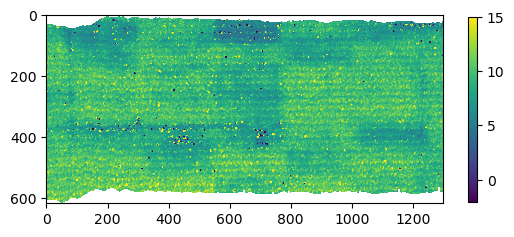

In [5]:
io.show_img(array_mtci, vmin=-2, vmax=15)

***

## `segment.band_math_mcari2`
Calculates the MCARI2 (Modified Chlorophyll Absorption Ratio Index Improved; Haboudane et al., 2004) spectral index from three input bands and/or wavelengths. Bands/wavelengths can be input as two individual bands, two sets of bands (i.e., list of bands), or range of bands (i.e., list of two bands indicating the lower and upper range). [[API]](api/hs_process.segment.html#hs_process.segment.band_math_mcari2)

Load `hsio` and `segment` modules

In [6]:
from hs_process import hsio
from hs_process import segment

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_segment = segment(io.spyfile)

Calculate the MCARI2 spectral index ([Haboudane et al., 2004](https://www.sciencedirect.com/science/article/pii/S0034425704000264)) via `segment.band_math_mcari2`

In [7]:
array_mcari2, metadata = my_segment.band_math_mcari2(wl1=800, wl2=670, wl3=550, spyfile=io.spyfile)
print('Array shape: {0}'.format(array_mcari2.shape))
print('Array mean value: {0:.2f}'.format(np.nanmean(array_mcari2)))

Band 1: [198]  Band 2: [135]  Band 3: [77]
Wavelength 1: [799.0016]  Wavelength 2: [669.6752]  Wavelength 3: [550.6128]
Array shape: (617, 1300)
Array mean value: 0.57


Show MCARI2 image via `hsio.show_img`

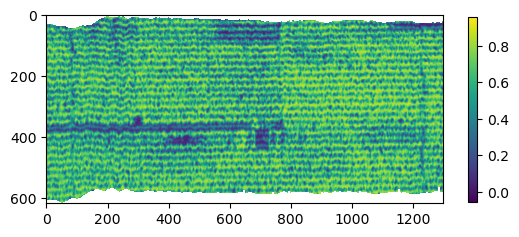

In [8]:
io.show_img(array_mcari2)

***

## `segment.band_math_ndi`
Calculates a normalized difference spectral index from two input bands and/or wavelengths. Bands/wavelengths can be input as two individual bands, two sets of bands (i.e., list of bands), or range of bands (i.e., list of two bands indicating the lower and upper range). [[API]](api/hs_process.segment.html#hs_process.segment.band_math_ndi)

Load `hsio` and `segment` modules

In [9]:
from hs_process import hsio
from hs_process import segment

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_segment = segment(io.spyfile)

Calculate the Normalized difference vegetation index using 10 nm bands centered at 800 nm and 680 nm via `segment.band_math_ndi`

In [10]:
array_ndvi, metadata = my_segment.band_math_ndi(wl1=[795, 805], wl2=[675, 685], spyfile=io.spyfile)
print('Array shape: {0}'.format(array_ndvi.shape))
print('Array mean value: {0:.2f}'.format(np.nanmean(array_ndvi)))

Effective NDI: (800 - 680) / 800 + 680)
Array shape: (617, 1300)
Array mean value: 0.82


Show NDVI image via `hsio.show_img`

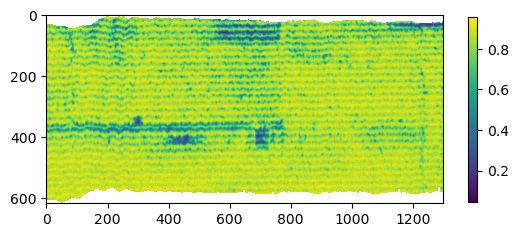

In [11]:
io.show_img(array_ndvi)

***

## `segment.band_math_ratio`
Calculates a simple ratio spectral index from two input band and/or wavelengths. Bands/wavelengths can be input as two individual bands, two sets of bands (i.e., list of bands), or a range of bands (i.e., list of two bands indicating the lower and upper range). [[API]](api/hs_process.segment.html#hs_process.segment.band_math_ratio)

Load `hsio` and `segment` modules

In [12]:
from hs_process import hsio
from hs_process import segment

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_segment = segment(io.spyfile)

Calculate a red/near-infrared band ratio using a range of bands (i.e., mimicking a broadband sensor) via `segment.band_math_ratio`

In [13]:
array_ratio, metadata = my_segment.band_math_ratio(wl1=[630, 690], wl2=[800, 860], list_range=True)
print('Array shape: {0}'.format(array_ratio.shape))
print('Array mean value: {0:.2f}'.format(np.nanmean(array_ratio)))

Effective band ratio: (659/830)
Array shape: (617, 1300)
Array mean value: 0.11


Notice that 29 spectral bands were consolidated (i.e., averaged) to mimic a single broad band. We can take the mean of two bands by changing `list_range` to `False`, and this slightly changes the result.

In [14]:
array_ratio, metadata = my_segment.band_math_ratio(wl1=[630, 690], wl2=[800, 860], list_range=False)
print('Array shape: {0}'.format(array_ratio.shape))
print('Array mean value: {0:.2f}'.format(np.nanmean(array_ratio)))

Effective band ratio: (660/830)
Array shape: (617, 1300)
Array mean value: 0.11


Show the red/near-infrared ratio image via ``hsio.show_img``

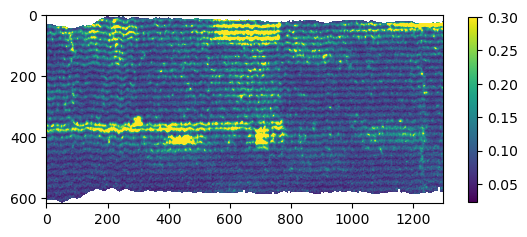

In [15]:
io.show_img(array_ratio, vmax=0.3)

***

## `segment.load_spyfile`
Loads a `SpyFile` (Spectral Python object) for data access and/or manipulation by the `hstools` class. [[API]](api/hs_process.segment.html#hs_process.segment.load_spyfile)

Load `hsio` and `segment` modules

In [16]:
from hs_process import hsio
from hs_process import segment

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_segment = segment(io.spyfile)

Load datacube  via `segment.load_spyfile`

In [17]:
my_segment.load_spyfile(io.spyfile)
my_segment.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32